In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
train = catalog.load("light_train")
train.set_index('index', inplace=True)
display(train.head())

[04/06/23 14:29:44] INFO     Loading data from 'light_train' (PickleDataSet)...                 ]8;id=501848;file:///Users/iferreiro/miniconda3/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=703458;file:///Users/iferreiro/miniconda3/lib/python3.10/site-packages/kedro/io/data_catalog.py#343\343]8;;\

,session_id,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,level_group
index,,,,,,,,,,,,,,,,
0,20090312431273200,0,cutscene_click,basic,0,NaN,-414.0,-159.375,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0-4
1,20090312431273200,1323,person_click,basic,0,NaN,-414.0,-159.375,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
2,20090312431273200,831,person_click,basic,0,NaN,-414.0,-159.375,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
3,20090312431273200,1147,person_click,basic,0,NaN,-414.0,-159.375,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
4,20090312431273200,1863,person_click,basic,0,NaN,-413.0,-159.375,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4


# Columns
* session_id - the ID of the session the event took place in
* index - the index of the event for the session
* elapsed_time - how much time has passed (in milliseconds) between the start of the session and when the event was recorded
* event_name - the name of the event type
* name - the event name (e.g. identifies whether a notebook_click is is opening or closing the notebook)
* level - what level of the game the event occurred in (0 to 22)
* page - the page number of the event (only for notebook-related events)
* room_coor_x - the coordinates of the click in reference to the in-game room (only for click events)
* room_coor_y - the coordinates of the click in reference to the in-game room (only for click events)
* screen_coor_x - the coordinates of the click in reference to the player’s screen (only for click events)
* screen_coor_y - the coordinates of the click in reference to the player’s screen (only for click events)
* hover_duration - how long (in milliseconds) the hover happened for (only for hover events)
* text - the text the player sees during this event
* fqid - the fully qualified ID of the event
* room_fqid - the fully qualified ID of the room the event took place in
* text_fqid - the fully qualified ID of the event
* fullscreen - whether the player is in fullscreen mode
* hq - whether the game is in high-quality
* music - whether the game music is on or off
* level_group - which group of levels - and group of questions - this row belongs to (0-4, 5-12, 13-22)

Conut NAs per column:

In [90]:
display(train.isna().sum())

session_id               0
elapsed_time             0
event_name               0
name                     0
level                    0
page              25732402
room_coor_x        2073272
room_coor_y        2073272
screen_coor_x      2073272
screen_coor_y      2073272
hover_duration    24294702
text              16679807
fqid               8274415
room_fqid                0
text_fqid         16679702
level_group              0
dtype: int64

## Event names
Explore counts of each event

In [91]:
display(train['event_name'].value_counts())

navigate_click        11326433
person_click           6052853
cutscene_click         2703035
object_click           2198211
object_hover           1057085
map_hover               945159
notification_click      649001
notebook_click          564544
map_click               517242
observation_click       212355
checkpoint               71028
Name: event_name, dtype: int64

In [92]:
display(pd.pivot_table(train, values='session_id', index='event_name', columns='name', aggfunc='count'))

name,basic,close,next,open,prev,undefined
event_name,,,,,,
checkpoint,71028,0,0,0,0,0
cutscene_click,2703035,0,0,0,0,0
map_click,46087,28623,0,0,0,442532
map_hover,945159,0,0,0,0,0
navigate_click,0,0,0,0,0,11326433
notebook_click,63416,235132,11607,235139,19250,0
notification_click,649001,0,0,0,0,0
object_click,1785270,412941,0,0,0,0
object_hover,120265,0,0,0,0,936820


Explore relationship between event names and NA values of the other columns

In [93]:
display(train[train.columns.difference(['event_name'])].isnull().groupby(train['event_name']).sum().astype(int).join(train['event_name'].value_counts()))

,elapsed_time,fqid,hover_duration,level,level_group,name,page,room_coor_x,room_coor_y,room_fqid,screen_coor_x,screen_coor_y,session_id,text,text_fqid,event_name
event_name,,,,,,,,,,,,,,,,
checkpoint,0,0,71028,0,0,0,71028,71028,71028,0,71028,71028,0,71028,71028,71028
cutscene_click,0,0,2703035,0,0,0,2703035,0,0,0,0,0,0,0,0,2703035
map_click,0,74710,517242,0,0,0,517242,0,0,0,0,0,0,517242,517242,517242
map_hover,0,0,0,0,0,0,945159,945159,945159,0,945159,945159,0,945159,945159,945159
navigate_click,0,6986160,11326433,0,0,0,11326433,0,0,0,0,0,0,11326433,11326433,11326433
notebook_click,0,564544,564544,0,0,0,0,0,0,0,0,0,0,564544,564544,564544
notification_click,0,649001,649001,0,0,0,649001,0,0,0,0,0,0,66,0,649001
object_click,0,0,2198211,0,0,0,2198211,0,0,0,0,0,0,2198211,2198211,2198211
object_hover,0,0,0,0,0,0,1057085,1057085,1057085,0,1057085,1057085,0,1057085,1057085,1057085


## Sessions
Histogram of events count per session

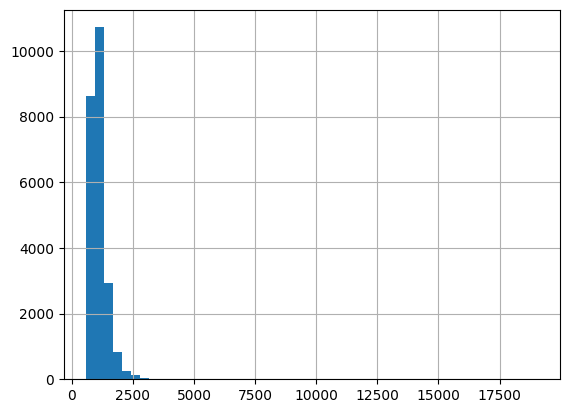

In [94]:
train.groupby('session_id')['elapsed_time'].count().hist(bins = 50)
plt.show()

Verification of the fact that every session has reached to the last level

In [95]:
train.groupby('session_id')['level'].max().max()

22

Exploration of the event counts in each session

event_name,checkpoint,cutscene_click,map_click,map_hover,navigate_click,notebook_click,notification_click,object_click,object_hover,observation_click,person_click
session_id,,,,,,,,,,,
20090312431273200,3,100,16,27,354,0,27,59,38,8,249
20090312433251036,3,112,64,219,801,59,28,172,103,10,260
20090312455206810,3,120,19,30,247,32,24,40,24,4,215
20090313091715820,3,112,18,39,416,9,28,79,45,10,234
20090313571836404,3,92,18,15,279,11,25,42,31,8,222
...,...,...,...,...,...,...,...,...,...,...,...
22100215342220508,3,99,16,27,308,20,29,77,55,10,229
22100215460321130,3,112,25,67,301,21,26,83,53,8,286
22100217104993650,3,115,18,27,495,67,34,110,52,9,269


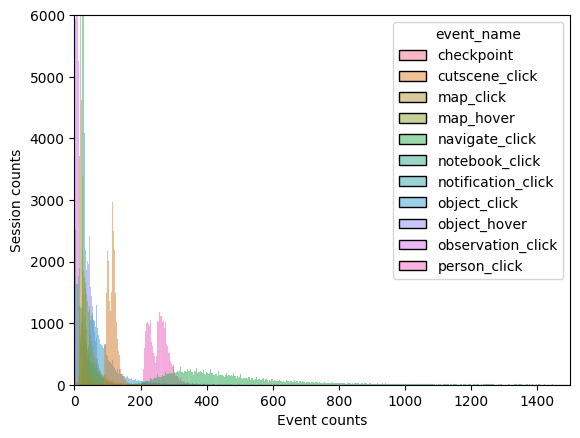

In [97]:
events_per_session = pd.pivot_table(train, values='elapsed_time', index='session_id', columns='event_name', aggfunc='count')
display(events_per_session)
ax1 = sns.histplot(data = events_per_session.reset_index(drop=True))
ax1.set_xlim(0,1500)
ax1.set_ylim(0,6000)
ax1.set_xlabel('Event counts')
ax1.set_ylabel('Session counts')
plt.show()

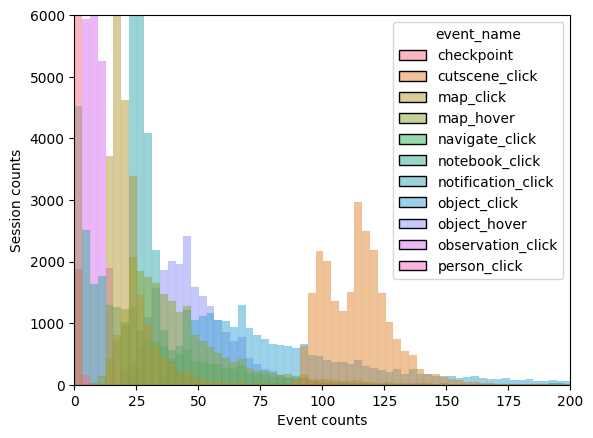

In [98]:
ax2 = sns.histplot(data = events_per_session.reset_index(drop=True))
ax2.set_xlim(0,200)
ax2.set_ylim(0,6000)
ax2.set_xlabel('Event counts')
ax2.set_ylabel('Session counts')
plt.show()

In [99]:
events_per_level_session = pd.pivot_table(train, values='elapsed_time',
                                             index=['session_id', 'level_group'],
                                             columns='event_name', aggfunc='count').reset_index()
display(events_per_level_session)
epls_pivot = events_per_level_session.drop('session_id', axis = 1)

event_name,session_id,level_group,checkpoint,cutscene_click,map_click,map_hover,navigate_click,notebook_click,notification_click,object_click,object_hover,observation_click,person_click
0,20090312431273200,0-4,1,28,2,4,81,0,8,11,4,4,22
1,20090312431273200,13-22,1,60,6,14,170,0,10,20,13,3,123
2,20090312431273200,5-12,1,12,8,9,103,0,9,28,21,1,104
3,20090312433251036,0-4,1,36,3,3,49,2,5,15,5,2,18
4,20090312433251036,13-22,1,65,45,186,637,50,14,83,66,5,145
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70681,22100219442786200,13-22,1,54,8,13,181,26,8,15,11,5,101
70682,22100219442786200,5-12,1,11,7,10,85,18,9,23,18,1,95
70683,22100221145014656,0-4,1,31,2,2,92,6,9,27,9,5,27
70684,22100221145014656,13-22,1,76,16,65,363,22,6,48,20,4,139


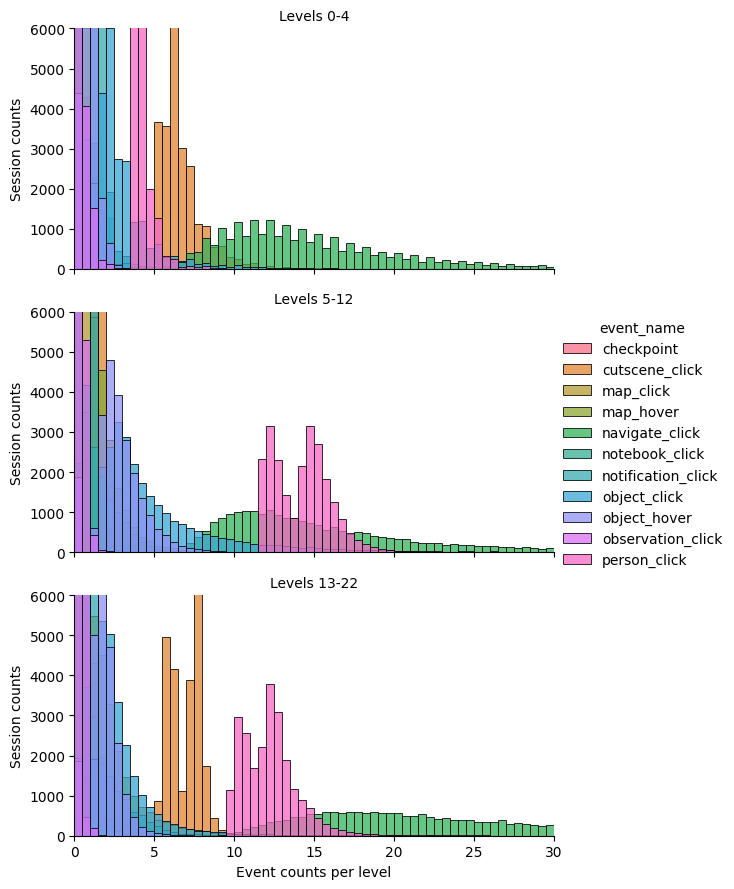

In [100]:
epls = train.groupby(['session_id', 'level_group', 'event_name'])['elapsed_time']. \
    count().reset_index().drop('session_id', axis = 1).rename({'elapsed_time': 'event_counts'}, axis = 1)
epls['levels'] = np.where(epls['level_group'] == '0-4', 5,
                         np.where(epls['level_group'] == '5-12', 8, 10))
epls['events_per_level'] = epls['event_counts'] / epls['levels']
epls.drop(['event_counts', 'levels'], axis = 1, inplace = True)
grid = sns.FacetGrid(data = epls, row='level_group', row_order=['0-4','5-12','13-22'], aspect = 2, hue = 'event_name', )
h = grid.map_dataframe(sns.histplot, x = 'events_per_level', bins = np.arange(0,31,0.5))
h.set_titles('Levels {row_name}')
h.set_xlabels('Event counts per level')
h.set_ylabels('Session counts')
h.set(xlim=(0,30),ylim=(0,6000))
grid.add_legend()